### A/B testing

Imagine that you are an analyst at a very large pizza delivery company working on a delivery app.  

You have several restaurants in different parts of the city and a whole staff of couriers. But there is one problem - in the evening, the delivery speed drops due to the fact that the couriers go home after the working day, and the number of orders only grows.  

Our data scientists have come up with a new algorithm that allows couriers to schedule their last orders before the end of the working day so that their delivery route matches the route home.  

Together with your team, you decided to roll out an A/B test for two equal groups of couriers. Some couriers use the old algorithm without the "along the way" option, others see this option in their application and can select it.  

Your task is to analyze the data of the experiment and help the business make a decision about rolling out a new feature to all couriers.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,6)}, style="darkgrid")

In [22]:
df = pd.read_csv('experiment_lesson_4.csv')

In [23]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


Null hypothesis (H0): There is no difference between the average delivery time in the test and control groups.  
Alternative hypothesis (H1): There is a difference between the average delivery time in the test and control groups.

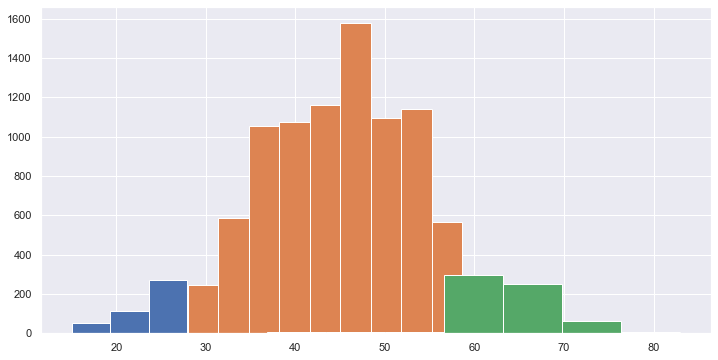

In [24]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist();

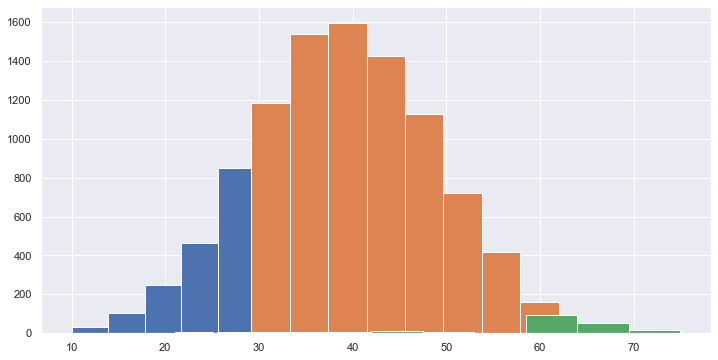

In [25]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist();

Text(0.5, 1.0, 'Distribution in test group')

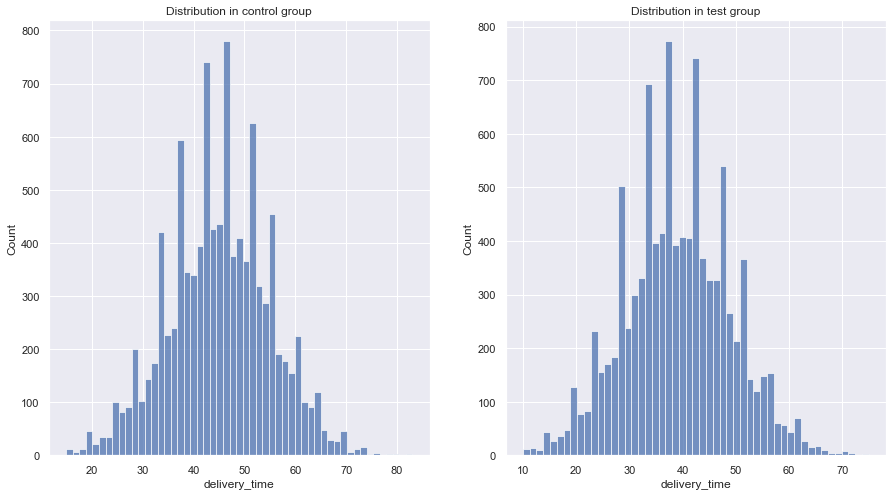

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
sns.histplot(df.query('experiment_group == "control"').delivery_time, ax=ax[0], palette="rocket").set_title('Distribution in control group')
sns.histplot(df.query('experiment_group == "test"').delivery_time, ax=ax[1], palette="rocket").set_title('Distribution in test group')

To check if the distribution is normal, I use SHAPIRO-WILK TEST.  
This test shows that the values in the control and test group are the distribution is NORMAL

In [29]:
stats.shapiro(df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17))

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [30]:
stats.shapiro(df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

To compare the means in these experimental groups, I use STUDENT'S T-TEST

In [33]:
statistic, pvalue = stats.ttest_ind(df[df['experiment_group'] == 'test']['delivery_time'], df[df['experiment_group'] == 'control']['delivery_time'])

In [34]:
prob = 0.95
alpha = 1.0 - prob
if pvalue <= alpha:
    print('The significance level is p < 0.05, which means that the obtained deviations are statistically significant - we reject H0')
else:
    print('The significance level is p > 0.05, which means that the obtained deviations are not statistically significant - we do not reject H0')

The significance level is p < 0.05, which means that the obtained deviations are statistically significant - we reject H0


The average delivery time in the test group compared to the control group changed by -13.35%

In [32]:
(df[df['experiment_group'] == 'test']['delivery_time'].mean() - df[df['experiment_group'] == 'control']['delivery_time'].mean())/df[df['experiment_group'] == 'control']['delivery_time'].mean()

-0.13354653121660812

**Conclusion.**
We roll out the new algorithm for everyone, since the average delivery time has changed statistically significantly.  
The average delivery time in the test is less than in the control.